# **CIFAR-100 - Unsupervised Machine Learning Model**

# **1 - Importing Required Libraries**

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# **2 - Loading The Data**

In [2]:
df = tf.keras.datasets.cifar100.load_data()

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


By loading our data we will use the code line ```(X_train, _), (X_test, _) = df``` instead of ```(X_train, y_train), (X_test, y_test) = df``` to avoid loading the labels to our train and test samples.

In [3]:
(X_train, _), (X_test, _) = df

In [12]:
print(f"The train data includes {len(X_train)} images.")
print(f"The test data includes {len(X_test)} images.")

print(f"The shape of the train data is: {X_train.shape}")

The train data includes 50000 images.
The test data includes 10000 images.
The shape of the train data is: (50000, 32, 32, 3)


# 2.1 - Data Overview

2.1.1 Train versus Test Data

The CIFAR100 image dataset of tensorflows datasets contains:
- ```50.000``` train samples and
- ```10.000``` train samples

2.1.2 Sample Structures

All samples are:
- ```32px``` wide,
- ```32px``` high and
- ```3``` color channels deep (in other words, they are ```RGB``` images)

Note: The **labels** were neither added to train or test samples.

# **3 - Data Visualization**

We will visualize one image of each 100 categories we have. To do so we will iterate through all images using a for loop. For the random iteration we will use ```np.random.randint()``` function from the NumPy library.

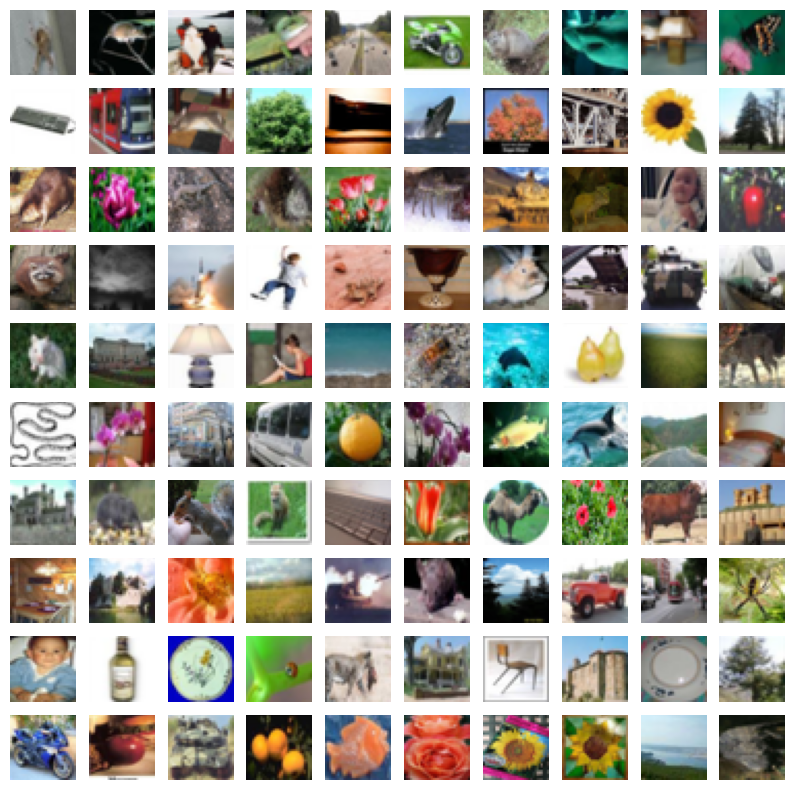

In [13]:
random_index = np.random.randint(0, len(X_train), 100)

def plot_images():
  plt.figure(figsize=(10, 10))

  for image in range(100):
    plt.subplot(10, 10, image + 1)
    plt.imshow(X_train[random_index[image]])
    plt.axis("off")

plot_images()

# **4 - Data Preparation/Reduction**

Before we go on to building the ```Model``` it is recommended to implement some data reduction before proceeding to ensure maximum efficiency.

So let's quickly print out the some pixel values from our train sample.

In [31]:
# Printing out the pixel values from the first image of our train sample

# [first sample], [first colour channel], [first row of pixels]
print("The pixel values of the first image: ", X_train[0][0][0])

The pixel values of the first image:  [255 255 255]


# 4.1 - Sample Reduction

4.1.1 - Sample Normalization

The problem is that the values we just printed span across a very large range!
So, in fact, we have to reduce it by mapping each value in the range of ```0-255``` to an equivalent value in the range of ```0-1```.
This technique is called **Normalization** where relationship between the values remains the same, but they are reduced to a smaller scale (Like imagine the computers are reading/working with 0 and 1s).
We'll simply divide each pixel value in our samples by 255, like down below:

In [4]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

4.1.2 - Updated Sample Values

After we prepared the normalization on the train and test samples we can print out the new state of the pixels from the first image of our train data.

In [34]:
# Printing out pixel values of the first image from our train data

print("The pixel values of the first image: ", X_train[0][0][0])

The pixel values of the first image:  [1. 1. 1.]


# 4.2 - Dimensionality Reduction

4.2.1 - Sample Flattening

To build our ```model``` we have to flatten our samples making it easier to train the model. By using the flattening technique the **3 dimesional** arrays of the images get reduced to a **single dimensional array**, what means the image gets converted to a long value of pixels which speeds up and makes it easier to process the taining by using machine learning algorithms like ```K-Means``` that treats flattened images as feature vectors.

In [5]:
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

4.2.2 - Flattened Sample Values

In [36]:
print(f"The shape of the train data after flattening: {X_train_flat.shape}")

The shape of the train data after flattening: (50000, 3072)


In [37]:
print(f"The shape of the test data after flattening: {X_test_flat.shape}")

The shape of the test data after flattening: (10000, 3072)


In [42]:
print("The pixel values of the first imagea after flattening: ", X_train_flat[0])

The pixel values of the first imagea after flattening:  [1.         1.         1.         ... 0.5411765  0.6784314  0.30980393]


# **5 - Model Building and Training**

Now, we go on to the most fun part, the building of our model. So, firstly we will proceed with the ```K-Means algorithm``` by fitting the model with the flattened data, then with the ```PCA (Principal Component Analysis) algorithm``` we will use the flattened data again to train the model with **K-Means** but at this time by reducing the dimensionality. After building the model we will **evaluate its performance** and at the end we will also build a **basline ```neural network```** to compare their performances and accuracies.

# 5.1 - Model Building with Clustering method

5.1.1 - Model Building with K-Means Clustering

In [6]:
# Applying K-Means Clustering
k_means = KMeans(n_clusters=100, random_state=42)
k_means.fit(X_train_flat)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=100, random_state=42)

5.1.2 - Model Building using PCA on flattened data

In [8]:
# Applying PCA for dimensionality reduction
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train_flat)
X_test_pca = pca.transform(X_test_flat)

In [9]:
# Applying K-Means Clustering on PCA flattened data
k_means_pca = KMeans(n_clusters=100, random_state=42)
k_means_pca.fit(X_train_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=100, random_state=42)

# **6 - Model Testing**

# 6.1 - Testing performance of K-Means Clusters without PCA dimensionality reduction

6.1.1 - Performing predictions on K-Means Clusters

In [11]:
y_pred_kmeans = k_means.predict(X_test_flat)

6.1.2 - Visualizing the Clusters

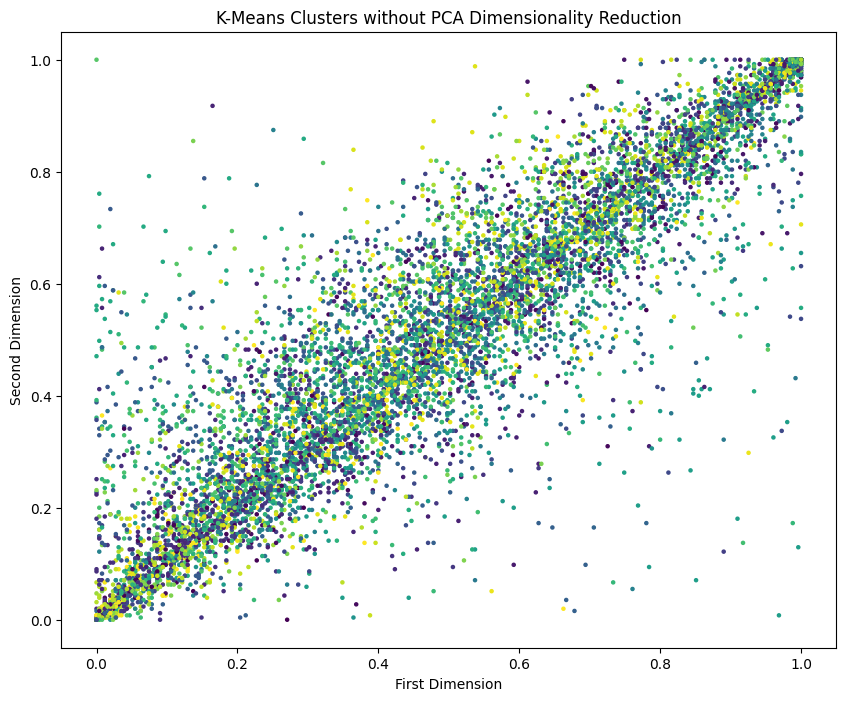

In [15]:
# Visualizing the K-Means Clusters without PCA dimensionality reduction
plt.figure(figsize=(10, 8))
plt.scatter(X_test_flat[:, 0], X_test_flat[:, 1], c=y_pred_kmeans, cmap='viridis', s=5)
plt.title("K-Means Clusters without PCA Dimensionality Reduction")
plt.xlabel("First Dimension")
plt.ylabel("Second Dimension")
plt.show()

# 6.2 - Testing Performance of K-Means Clusters with PCA Dimensionality Reduction

6.2.1 - Performing predictions on K-Means Clusters with PCA Dimensionality Reduction

In [16]:
y_pred_kmeans_pca = k_means_pca.predict(X_test_pca)

6.2.2 - Visualizing the Clusters with PCA Dimensionality Reduction

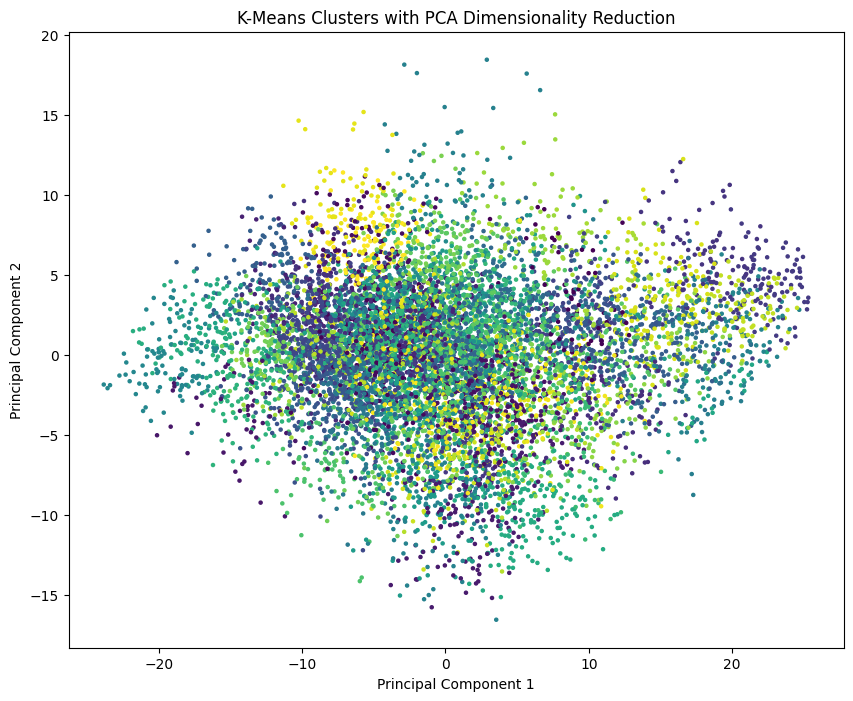

In [17]:
# Visualizing the K-Means Clusters with PCA dimensionality reduction
plt.figure(figsize=(10, 8))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred_kmeans_pca, cmap='viridis', s=5)
plt.title("K-Means Clusters with PCA Dimensionality Reduction")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# **7 - Building the Autoencoder Neural Network**

Now finally it's time for the  most exciting part. We will build a simple **autoencoder**. This is the Neural Network that we will proceed our exploration process with.

An autoencoder is a **special type of neural network that is trained to copy its input to its output**. For example, given an image of a handwritten digit, an autoencoder first encodes the image into a lower dimensional latent representation, then decodes the latent representation back to an image.

# 7.1 - Exploration Rules

You can remove, add or change the layers and their parameters, as long as you follow the following rules:

- do not change the input shape, it must remain: ```input_shape=(32, 32, 3)```, because it is the dimensional information of our images we are working with.
- do not change the loss, it must remain: ```loss = 'binary_crossentropy'```

# 7.2 - Building Model

In [6]:
input_img = Input(shape=(32, 32, 3))

In [33]:
# Encoder

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)


# Building Autoencoder
autoencoder = Model(input_img, decoded)

# Model Compiling
autoencoder.compile(optimizer='adam',
                    loss='binary_crossentropy')

# Displaying Model Details
autoencoder.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 16, 16, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 8, 8, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_4 (UpSampling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 16, 16, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_5 (UpSampling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 32, 32, 3)           │             867 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,507 (115.26 KB)

 Trainable params: 29,507 (115.26 KB)

 Non-trainable params: 0 (0.00 B)

# **8 - Model Training**

# 8.1 - Model Validation

Usually, to train an Autoencoder such as ours, we have to perform a process called "Validation". However, it's beyond the scope of this notebook.
This notebook will collect **both train and validation metrics** rather than just the train ones, as we do in the next cell:

 - Train metric: ```autoencoder.history.history['accuracy']```
 - Train metric: ```autoencoder.history.history['loss']```
 - Validation metric: ```autoencoder.history.history['val_accuracy']```
 - Validation metric: ```autoencoder.history.history['val_loss']```

In [34]:
# Performing Validation on the Model

autoencoder.fit(
    X_train, X_train,
    epochs=2,
    batch_size=32,
    shuffle=True,
    validation_data=(X_test, X_test)
)

Epoch 1/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 188s 119ms/step - loss: 0.5595 - val_loss: 0.5385
Epoch 2/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 199s 117ms/step - loss: 0.5368 - val_loss: 0.5349


# 8.2 - Performing Training on Model

- **Epochs:** Each data sample passes through each model layer exactly ```number_of_epochs```times.
Where epoch represents one model iteration over the data, in our case - we have ```10```of them.
Please feel free to modify this value as told before, but keep in mind - the more epochs the longer your model will train!
By the way - More epochs does not always mean better results. It also depends on your built model's performance!
- **History/Autoencoder:** The history object we asiigned as **autoencoder** stores a dictionary that tracks the ```accuracy```and ```loss```metrics for each epoch.
- **Loss:** Loss must reduce over time, otherwise there is something wrong with your built model.
- **Accuracy:** Accuracy must improve over time, otherwise there is something wrong with your built model too.

In [39]:
# Training Model

autoencoder.fit(
    X_train, X_train,
    epochs=10,
    batch_size=64,
    shuffle=True,
    validation_data=(X_test, X_test)
)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 201s 257ms/step - loss: 0.5352 - val_loss: 0.5332
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 171s 216ms/step - loss: 0.5341 - val_loss: 0.5331
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 208s 224ms/step - loss: 0.5338 - val_loss: 0.5326
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 174s 223ms/step - loss: 0.5332 - val_loss: 0.5330
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 166s 213ms/step - loss: 0.5335 - val_loss: 0.5320
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 205s 217ms/step - loss: 0.5333 - val_loss: 0.5319
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 209s 226ms/step - loss: 0.5329 - val_loss: 0.5333
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 197s 219ms/step - loss: 0.5323 - val_loss: 0.5313
Epoch 9/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 198s 215ms/step - loss: 0.5327 - val_loss: 0.5315
Epoch 10/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 168s 214ms/step - loss: 0.5334 - val_loss: 0.5318


In [40]:
print(autoencoder.history.history.keys())

dict_keys(['loss', 'val_loss'])


In [41]:
print("\nInitial Loss: {} | Latest Loss: {}".format(autoencoder.history.history["loss"][0], autoencoder.history.history["loss"][-1]))
print("Initial Validation Loss: {} | Latest Validation Loss: {}".format(autoencoder.history.history["val_loss"][0], autoencoder.history.history["val_loss"][-1]))


Initial Loss: 0.534592866897583 | Latest Loss: 0.5322358012199402
Initial Validation Loss: 0.5332448482513428 | Latest Validation Loss: 0.531769335269928


# 8.3 - Plotting the Training Results

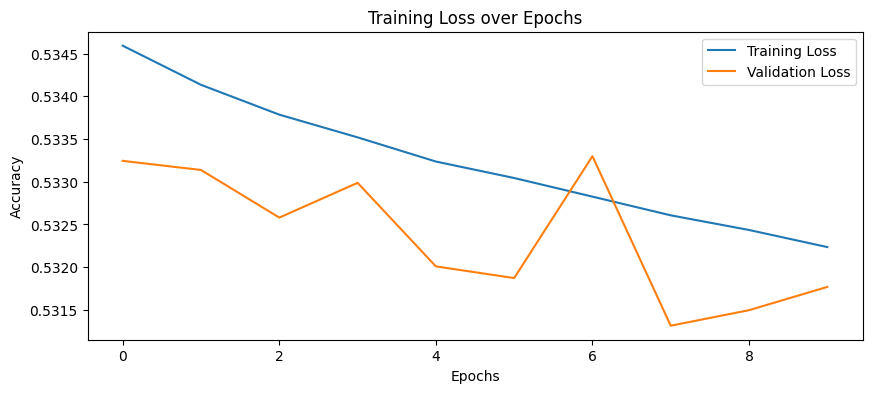

In [44]:
fig, axis = plt.subplots(figsize=(10, 4))

axis.plot(autoencoder.history.history["loss"], label="Training Loss")
axis.plot(autoencoder.history.history["val_loss"], label="Validation Loss")

axis.set_title("Training Loss over Epochs")
axis.set_xlabel("Epochs")
axis.set_ylabel("Accuracy")
axis.legend(loc="upper right")

plt.show()


# **9 - Model Evaluation**

In [45]:
test_loss = autoencoder.evaluate(X_test, X_test)
print("Test Loss: ", test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - loss: 0.5325
Test Loss:  0.5317693948745728


# 9.1 - Testing Model by making predictions

To the conclusion we make some predictions by using 10 images of the test sample and let the NN model predict the images reconstructing them.

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step


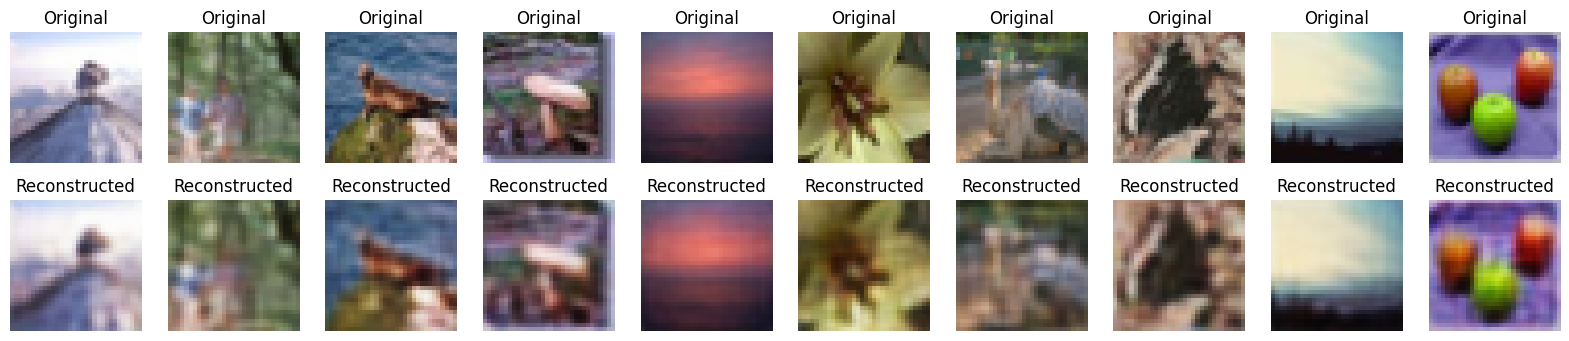

In [46]:
decoded_imgs = autoencoder.predict(X_test)

# Displaying original and reconstructed images

n = 10
plt.figure(figsize=(20, 4))

for image in range(n):

    # Displaying original
    ax = plt.subplot(2, n, image + 1)
    plt.imshow(X_test[image])
    plt.title("Original")
    plt.axis("off")

    # Displaying reconstruction
    ax = plt.subplot(2, n, image + 1 + n)
    plt.imshow(decoded_imgs[image])
    plt.title("Reconstructed")
    plt.axis("off")

plt.show()